In [ ]:
#Importing the required libraries
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

#Packages related to data visualizaiton
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly
#Importing libraries for the data pre-processing techniques
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import  PolynomialFeatures, KBinsDiscretizer, FunctionTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, OrdinalEncoder
import statsmodels.formula.api as smf
import statsmodels.tsa as tsa

#Importing libararies for the machine learning modoels.
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import BaggingClassifier, BaggingRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor 
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from xgboost import XGBClassifier

#Importing libraries for evaluation metrics
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_confusion_matrix

#Importing libraries for handling the data imbalance 
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler 
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

Importing the data set

In [ ]:
#Mounting the drive on google collab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Reading the data and putting it into a data frame
data = pd.read_csv('/content/drive/MyDrive/datasets/creditcard.csv')
df = pd.DataFrame(data)

In [ ]:
#Taking a look at the data 
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# **Explortatory Data Analysis on the dataset and it's features**

In [ ]:
#Checking datatypes for all the features in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
#Dividing the dataset into and X and Y datasets
y = df.Class
X = df.drop('Class', axis=1)

In [ ]:
#Checking null values from the data
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
#Checking the count and number of features i.e Data Shape
data.shape

(284807, 31)

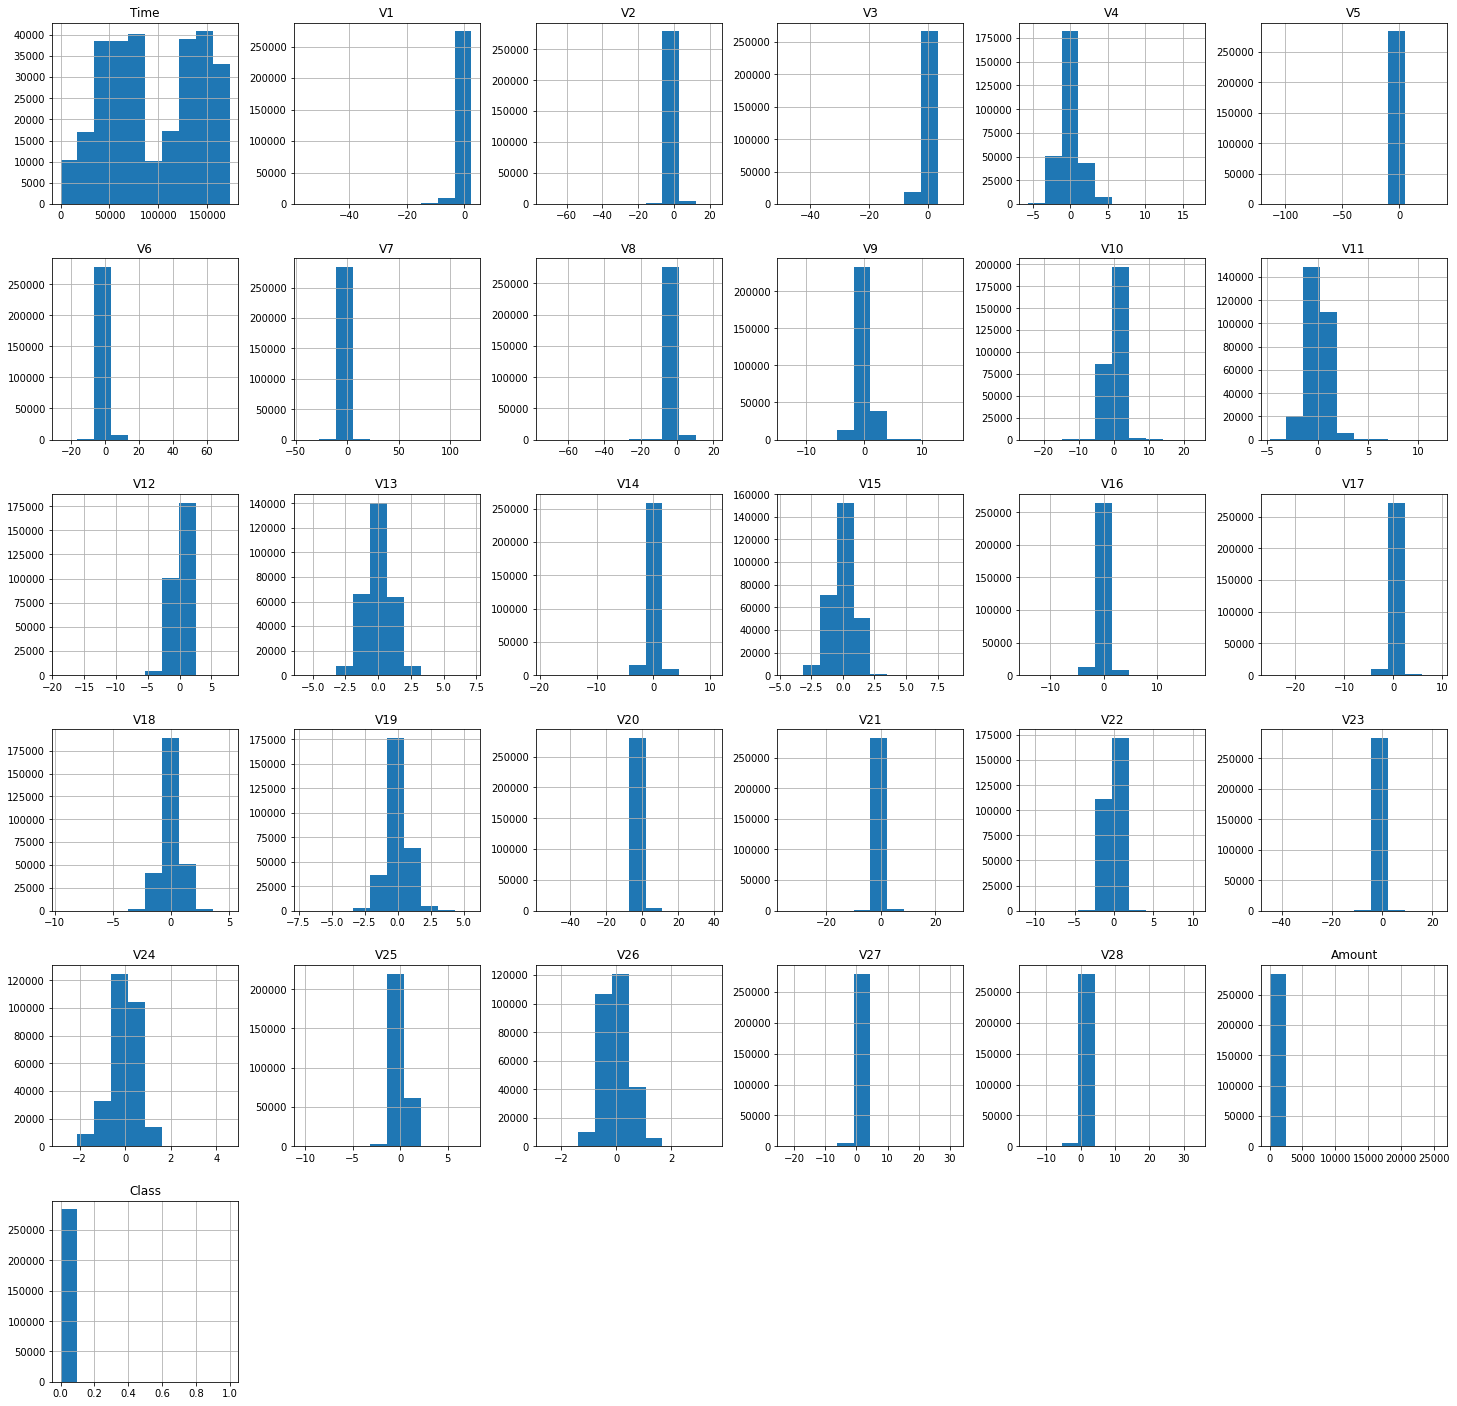

In [ ]:
#This shows the histogram plot of each attribute
data_plot = data
data_plot.hist(figsize = (25,25))
plt.show() 

In [ ]:
#Plotting a pie chart for checking the distribution of data
lis=["Not Fraud","Frauds"]
fraud_or_not = data["Class"].value_counts().tolist()
values = [fraud_or_not[0], fraud_or_not[1]]
fig = px.pie(values=data['Class'].value_counts(), names=lis , width=800, height=400, color_discrete_sequence=["skyblue","black"]
             ,title="percentage between Frauds & genuine transactions")
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



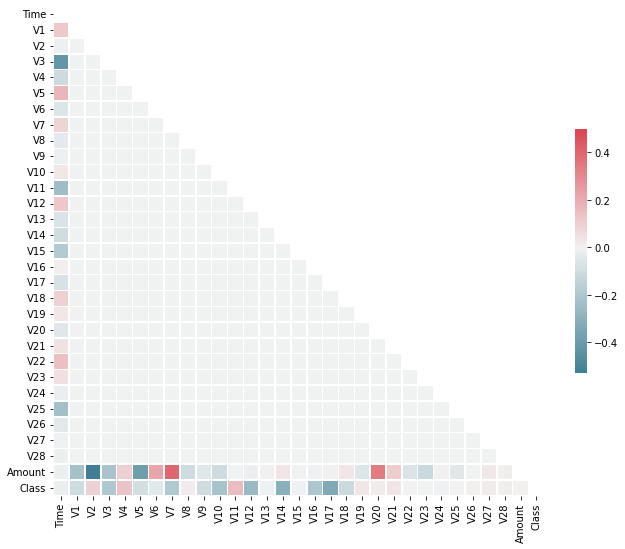

In [ ]:
#Plotting a correlation matrix to know the correlation between the features
corr=data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0, linewidths=.5, cbar_kws={"shrink": .5})

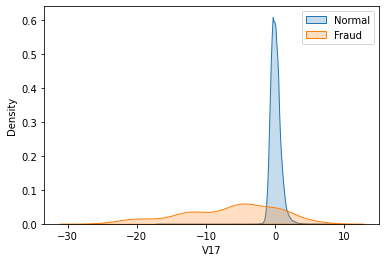

In [ ]:
#Plotting a kernel density plot for the V17 feature between the Normal and Fraud Transactions
plt.figure(figsize=(6,4))
sns.kdeplot(data=data[data['Class'] == 0]['V17'], label="Normal", shade=True)
sns.kdeplot(data=data[data['Class'] == 1]['V17'], label="Fraud", shade=True)
plt.legend()
plt.show()

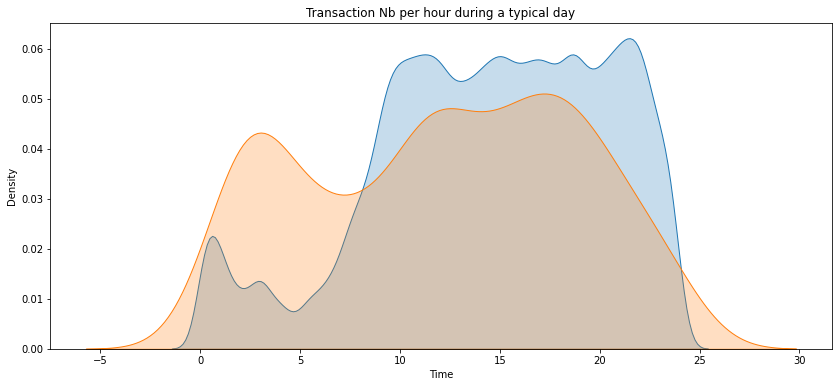

In [ ]:
#Plotting a kernel density plot for the time feature between the Normal and Fraud Transactions
plt.figure(figsize=(14, 6))
sns.kdeplot((data['Time'] / (60 * 60)) % 24, label = 'All transactions', shade=True)
sns.kdeplot((data.loc[data['Class'] == 1, 'Time'] / (60 * 60)) % 24, label = 'Fraud', shade=True)
plt.title('Transaction Nb per hour during a typical day')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



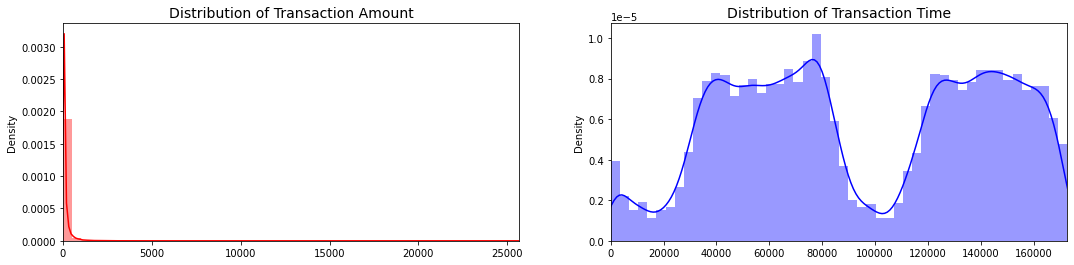

In [ ]:

#We are plotting the distribution plots for transaction amount and the transaction time 
fig, ax = plt.subplots(1, 2, figsize=(18,4))

Val_Amount = data['Amount'].values
Val_Time = data['Time'].values

sns.distplot(Val_Amount, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(Val_Amount), max(Val_Amount)])

sns.distplot(Val_Time, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(Val_Time), max(Val_Time)])

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Transaction Times for genuine users ')

<Figure size 576x288 with 0 Axes>

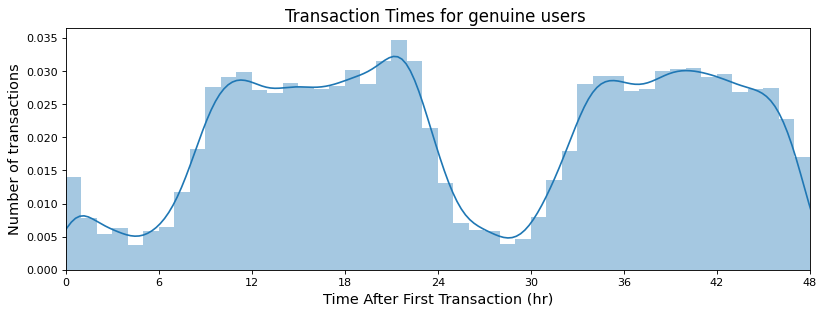

In [ ]:
# Plotting the transaction times for genuine user for genuine transactions
plt.figure(figsize=(8,4))
Nofraud_data = data [data['Class']==0]
plt.figure(figsize=(12,4), dpi=80)
sns.distplot(Nofraud_data [ 'Time']/60/60, bins=48)
plt.xticks(np.arange(0,54,6))
plt.xlim([0,48])
plt.xlabel('Time After First Transaction (hr)',fontsize=13)
plt.ylabel('Number of transactions',fontsize=13)
plt.title('Transaction Times for genuine users ',fontsize=15)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Transaction Times for Non-genuine (fraudulent) users')

<Figure size 576x288 with 0 Axes>

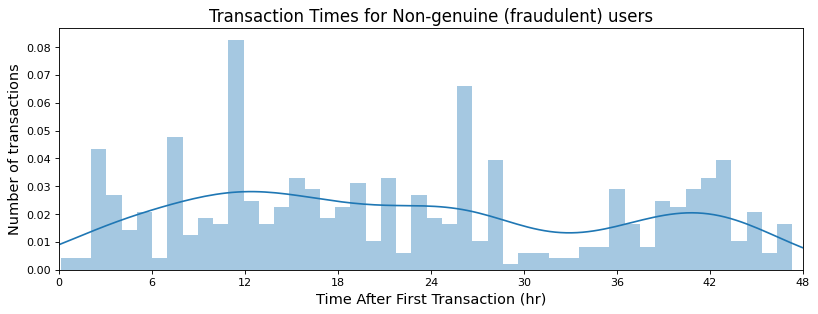

In [ ]:
#Plotting the distribution plot for the transaction times
plt.figure(figsize=(8,4))
Fraud_data = data [data['Class']==1]
plt.figure(figsize=(12,4), dpi=80)
sns.distplot(Fraud_data[ 'Time']/60/60, bins=48)
plt.xticks(np.arange(0,54,6))
plt.xlim([0,48])
plt.xlabel('Time After First Transaction (hr)',fontsize=13)
plt.ylabel('Number of transactions',fontsize=13)
plt.title('Transaction Times for Non-genuine (fraudulent) users',fontsize=15)

# **Feature Scaling**

In [ ]:
#Using standard scaler for scaling the values for the features between 0 to 1
min (data.Amount) , max (data.Amount)
sc = StandardScaler()
amount = data['Amount'].values
data['Amount'] = sc.fit_transform(amount.reshape(-1, 1))
data = data.drop(['Amount'], axis=1)

In [ ]:
#Using Min-Max Scaling for the dataset
"""from sklearn.preprocessing import MinMaxScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
scaler = MinMaxScaler()
amount = data['Amount'].values
data = data.drop(['Amount'], axis=1)
print(scaler.fit(data))
print(scaler.data_max_)
print(scaler.transform(data))
print(scaler.transform([[2, 2]]))"""

"from sklearn.preprocessing import MinMaxScaler\ndata = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]\nscaler = MinMaxScaler()\namount = data['Amount'].values\ndata = data.drop(['Amount'], axis=1)\nprint(scaler.fit(data))\nprint(scaler.data_max_)\nprint(scaler.transform(data))\nprint(scaler.transform([[2, 2]]))"

# **Data Cleaning**

In [ ]:
#Dropping duplicates from the data 
data = data.drop_duplicates()

In [ ]:
print("few values of Amount column after applying StandardScaler:- \n {amount[0:4]}")

few values of Amount column after applying StandardScaler:- 
 {amount[0:4]}


In [ ]:
#Dropping the time column from the data 
data.drop(['Time'], axis=1, inplace=True)

In [ ]:
#data.drop_duplicates(inplace=True)

In [ ]:
#Dropping null values from the data
data=data.dropna()
data=data.dropna(axis=0)

In [ ]:
#Dividing the data into training and testing datasets
X = data.drop('Class', axis = 1).values
y = data['Class'].values

unique, counts = np.unique(y, return_counts=True)
print(np.asarray((unique, counts)).T)

[[     0 283253]
 [     1    473]]


In [ ]:
#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 27)


In [ ]:
unique, counts = np.unique(y_train, return_counts=True)
print(np.asarray((unique, counts)).T)

[[     0 212458]
 [     1    336]]


# **Using Base Line methods to check the how they perform on the initial run**

**Logistic Regression**

In [ ]:
#Using Logistic Regression
lr = LogisticRegression(C = 100)
lr.fit(X_train , y_train)
lr_yhat = lr.predict(X_test)

In [ ]:
lr.score(X_train , y_train).round(5)

0.9992

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



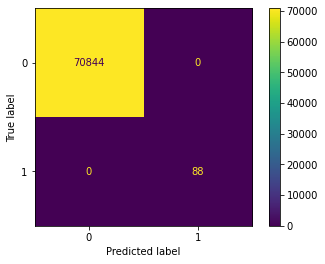

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



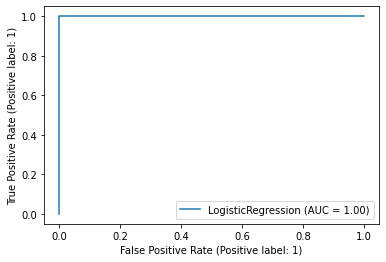

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70795
           1       0.91      0.58      0.71       137

    accuracy                           1.00     70932
   macro avg       0.95      0.79      0.86     70932
weighted avg       1.00      1.00      1.00     70932



In [ ]:
#Plotting a confustion matrix and roc curve for the Decision tree
plot_confusion_matrix(lr,  X_test, lr_yhat) 
plt.show()
plot_roc_curve(lr,  X_test, lr_yhat) 
plt.show()
print(classification_report( y_test, lr_yhat))

**Decision Tree**

In [ ]:
#Decision Tree 
DT = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
DT.fit(X_train, y_train)
dt_yhat = DT.predict(X_test)

In [ ]:
DT.score(X_train , y_train).round(5)
f1_score(y_test, dt_yhat, average='macro')

# Checking accuracy
print(accuracy_score(y_test, dt_yhat))
# f1 score
print(f1_score(y_test, dt_yhat))
print(recall_score(y_test, dt_yhat))
print(classification_report(y_test, dt_yhat))


0.9994219816161958
0.8379446640316207
0.7737226277372263
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70795
           1       0.91      0.77      0.84       137

    accuracy                           1.00     70932
   macro avg       0.96      0.89      0.92     70932
weighted avg       1.00      1.00      1.00     70932



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



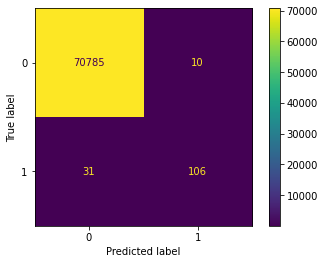

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



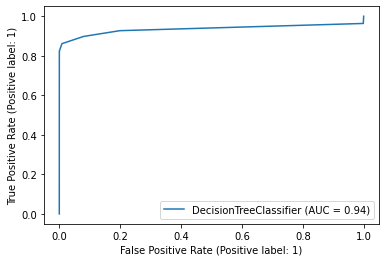

In [ ]:
#Plotting a confustion matrix and roc curve for the Decision tree
plot_confusion_matrix(DT, X_test, y_test) 
plt.show()
plot_roc_curve(DT, X_test, y_test) 
plt.show()

#f1_score(y_true, y_pred, average='weighted')

**K-nearest Neighbors Classifier**

In [ ]:
#K- Nearest Neighbors Classification model
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
knn.score(X_train, y_train).round(5)
knn.score(X_test, y_test).round(5)
Knn_preds=knn.predict(X_test)



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



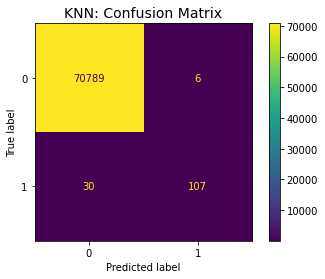

In [ ]:
#Plotting a confusion matrix for KNN
plot_confusion_matrix(knn, X_test, y_test)
plt.title('KNN: Confusion Matrix', fontsize=14)
plt.show()



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



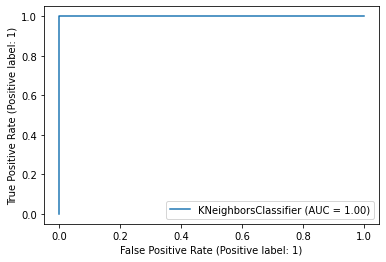

In [ ]:
#Plotting a confustion matrix and roc curve for the KNN

plot_roc_curve(knn, X_test, Knn_preds) 
plt.show()


In [ ]:
print(classification_report(y_test, Knn_preds))
#Checking the mean accuracy score for the KNN model
knn.score(X_test, y_test).round(5)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70795
           1       0.95      0.78      0.86       137

    accuracy                           1.00     70932
   macro avg       0.97      0.89      0.93     70932
weighted avg       1.00      1.00      1.00     70932



0.99949

In [ ]:
#Using a Support vector machine classifier as ML model
svm = SVC()
svm.fit(X_train, y_train)
svm_yhat = svm.predict(X_test)

In [ ]:
#Plotting a confustion matrix and roc curve for the SVM Classifier
plot_confusion_matrix(svm, X_test, y_test) 
plt.show()
plot_roc_curve(svm, y_test, svm_yhat) 
plt.show()
print(classification_report(y_test, svm_yhat))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



ValueError: ignored

In [ ]:
#Using Random Forest as an ML model
rf_cl = RandomForestClassifier(max_features=8 , max_depth=6)
rf_preds = rf_cl.fit(X_train, y_train)
rf_preds.predict(X_test)

In [ ]:
#Getting a mean acccuracy score for the test data and labels
rf_cl.score(X_train, y_train).round(5)

In [ ]:
#Checking precison,recall and F-1 score for Random forest
print(classification_report(y_test, rf_preds.predict(X_test)))

#Plotting a confustion matrix and roc curve for the Random Forest
plot_confusion_matrix(rf_cl, X_test, y_test) 
plt.show()
plot_roc_curve(rf_cl, X_test, y_test)
plt.show()

In [ ]:
#Using xgBoost as an ML model
xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train, y_train)
xgb_yhat = xgb.predict(X_test)

In [ ]:
#Checking the mean accuracy score for the XG-Boost model
xgb.score(X_test, y_test).round(5)
#Checking the classification report for the mean accuracy score, precision, and recall 
print(classification_report(y_test, xgb_yhat))

In [ ]:
#Plotting a confustion matrix and roc curve for the XG Boost model
plot_confusion_matrix(xgb, X_test, y_test) 
plt.show()
plot_roc_curve(xgb,X_test, y_test) 
plt.show()


**Dealing with the Data Imbalance**

**Oversampling**

In [ ]:
 #Random Oversampling on the dataset
X, y = make_classification(n_classes=2, class_sep=2,
weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)
print('Original dataset shape %s' % Counter(y))
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state = 0)

In [ ]:
#Using Random Forest as an ML model
rf_cl = RandomForestClassifier(max_features=8 , max_depth=6)
rf_preds = rf_cl.fit(X_train, y_train)
rf_preds.predict(X_test)

In [ ]:
#Getting a mean acccuracy score for the test data and labels
rf_cl.score(X_train, y_train).round(5)

In [ ]:
#Checking precison,recall and F-1 score for Random forest
print(classification_report(y_test, rf_preds.predict(X_test)))

#Plotting a confustion matrix and roc curve for the Random Forest
plot_confusion_matrix(rf_cl, X_test, y_test) 
plt.show()
plot_roc_curve(rf_cl,  X_test, y_test)
plt.show()

In [ ]:
#Using xgBoost as an ML model
xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train, y_train)
xgb_yhat = xgb.predict(X_test)

In [ ]:
#Checking the mean accuracy score for the XG-Boost model
xgb.score(X_test, y_test).round(5)

In [ ]:
#Plotting a confustion matrix and roc curve for the Decision tree
plot_confusion_matrix(xgb, X_test, y_test) 
plt.show()
plot_roc_curve(xgb, X_test, y_test) 
plt.show()
#Checking the classification report for the mean accuracy score, precision, recall and 
print(classification_report(y_test, xgb_yhat))

**Using SMOTE**

In [ ]:
#Using smote on the data split to balance the dataset
sm = SMOTE(random_state=27, sampling_strategy=1.0)
X_smote, y_smote = sm.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size = 0.2, random_state = 0)

In [ ]:
#Using smote on Logistic Regression
smote_lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
smote_pred = smote_lr.predict(X_test)
# Checking accuracy
print(accuracy_score(y_test, smote_pred))
# f1 score
print(f1_score(y_test, smote_pred))
print(recall_score(y_test, smote_pred))
print(classification_report(y_test, smote_pred))


In [ ]:
#Using Random Forest as an ML model
rf_cl = RandomForestClassifier(max_features=8 , max_depth=6)
rf_preds = rf_cl.fit(X_train, y_train)
rf_preds.predict(X_test)

In [ ]:
#Getting a mean acccuracy score for the test data and labels
rf_cl.score(X_train, y_train).round(5)

In [ ]:

#Checking precison,recall and F-1 score for Random forest
print(classification_report(y_test, rf_preds.predict(X_test)))

#Plotting a confustion matrix and roc curve for the Random Forest
plot_confusion_matrix(rf_cl, X_test, y_test) 
plt.show()
plot_roc_curve(rf_cl,  X_test, y_test)
plt.show()

In [ ]:
#Using xgBoost as an ML model
xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train, y_train)
xgb_yhat = xgb.predict(X_test)

In [ ]:
#Checking the mean accuracy score for the XG-Boost model
xgb.score(X_test, y_test).round(5)

In [ ]:
#Plotting a confustion matrix and roc curve for the Decision tree
plot_confusion_matrix(xgb, X_test, y_test) 
plt.show()
plot_roc_curve(xgb, X_test, y_test) 
plt.show()
#Checking the classification report for the mean accuracy score, precision, recall and 
print(classification_report(y_test, xgb_yhat))

In [ ]:
#Checking the F1-score, precision and recall
print(f1_score(y_test, xgb_yhat))
print(recall_score(y_test, xgb_yhat))
print(precision_score(y_test, xgb_yhat))